# Shi-Tomasiのコーナー検出とトラッキング(追跡)に向いた特徴

## 目的
このチュートリアルでは,
* Harrisの方法とは別のコーナー検出法 Shi-Tomasiのコーナー検出を学ぶ．
* 次の関数の使い方を学ぶ: [cv2.goodFeaturesToTrack()](https://docs.opencv.org/3.4.1/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541)

## 理論
前のチュートリアルではHarrisのコーナー検出を学んだ．その後1994年にJ. Shi & C. Tomasiが __Good Features to Track__（物体追跡によい特徴）という論文で改善案を提案した。そしてこれはHarrisのコーナー検出の結果よりも良い結果を示すものであった．

Harrisのコーナー検出の評価関数の定義は以下であった:
<CENTER>$R = \lambda_1 \lambda_2 - k(\lambda_1+\lambda_2)^2$</CENTER>

Shi-Tomasiのコーナー検出ではこの関数の代わりに以下を使う:
<CENTER>$R = min(\lambda_1, \lambda_2)$</CENTER>

このRの値が閾値より大きければコーナーとみなす．Harrisのコーナー検出と同様に $\lambda_1 - \lambda_2$ 空間でのRの値をプロットすると，以下の図のようになる:
![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/shitomasi_space.png)

この図から， $\lambda_1$ と $\lambda_2$ の値が最小値 $\lambda_{min}$ 以上の時だけ，コーナー(緑色の領域)とみなされる．

## コード
OpenCVでは [cv2.goodFeaturesToTrack(image, maxCorners, qualityLevel, minDistance[, corners[, mask[, blockSize[, useHarrisDetector[, k]]]]])](https://docs.opencv.org/3.4.1/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541) という関数で実装されている．Shi-Tomasiの手法(指定次第ではHarrisのコーナー検出も使える)によって画像中にスコアが高い順にN個のコーナーを検出する．普通はimage引数にグレースケール画像1枚を入力として指定し，検出するコーナーの個数(maxCorners)を指定する．次に，検出するコーナーの質レベル(qualityLevel)を0から1の間の値で指定する（この値未満のものはコーナーとして採用されない）．最後に、2つのコーナー間のユークリッド距離の最小値(miniDistance)を与える．

これらの全情報によって，この関数は画像中のコーナー検出を行う．スコアが質レベルより低いコーナー候補はみな取り除かれる．スコアを基に残ったコーナーを降順でソートし，最もスコアの大きいコーナーから順にその周囲の最小のユークリッド距離以内のコーナーを取り除くことを繰り返し，最終的にN個のコーナーを返す．

次の例は25個のコーナーを見つける(コード、画像):

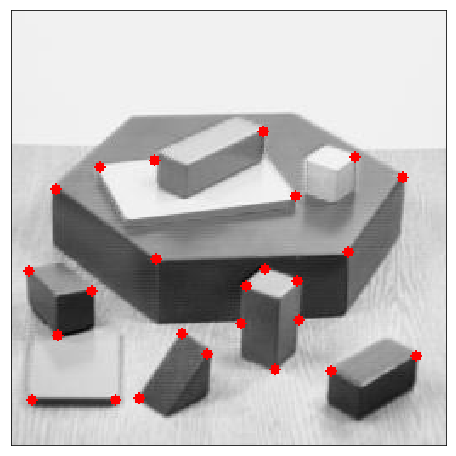

In [4]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('blox.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()

この関数はコーナー検出よりも物体追跡に向いている．これについては後で解説する．

## 補足資料
Shi, J. & Tomasi, C. (1994) [Good Features to Track](http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf). IEEE Conference on Computer Vision and Pattern Recognition (CVPR'94). pp.593 - 600.

## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: 特徴量検出と特徴量記述<BR>
特徴検出器，特徴量記述子について学ぶ
(http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/feature2d.html)
* 前の学習項目 [Harrisコーナー検出](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/featureHarris.html)<BR>
    コーナーは良い特徴か？どのように検出するのか？ [http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/featureHarris.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/featureHarris.ipynb)
* 次の学習項目 <BR>
SIFT (Scale-Invariant Feature Transform、スケール不変の特徴変換)の紹介
[http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/sift.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/sift.ipynb)